In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xlrd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [9]:
# read in the data
train = pd.read_csv('train.csv', low_memory = False)
test = pd.read_csv('test.csv',low_memory = False)
book = xlrd.open_workbook('WiDS data dictionary.xlsx')

In [10]:
train.head()

,train_id,AA3,AA4,AA5,AA6,AA7,AA14,AA15,DG1,is_female,...,GN1,GN1_OTHERS,GN2,GN2_OTHERS,GN3,GN3_OTHERS,GN4,GN4_OTHERS,GN5,GN5_OTHERS
0,0,3,32,3.0,NaN,323011,3854,481,1975,1,...,99.0,NaN,99,NaN,99,NaN,99,NaN,99,NaN
1,1,2,26,NaN,8.0,268131,2441,344,1981,1,...,NaN,NaN,1,NaN,2,NaN,2,NaN,2,NaN
2,2,1,16,NaN,7.0,167581,754,143,1995,1,...,1.0,NaN,2,NaN,2,NaN,2,NaN,2,NaN
3,3,4,44,5.0,NaN,445071,5705,604,1980,1,...,NaN,NaN,2,NaN,2,NaN,99,NaN,99,NaN
4,4,4,43,NaN,6.0,436161,5645,592,1958,1,...,NaN,NaN,1,NaN,1,NaN,1,NaN,1,NaN


In [11]:
test.head()

,test_id,AA3,AA4,AA5,AA6,AA7,AA14,AA15,DG1,DG3,...,GN1,GN1_OTHERS,GN2,GN2_OTHERS,GN3,GN3_OTHERS,GN4,GN4_OTHERS,GN5,GN5_OTHERS
0,0,4,41,NaN,7.0,417211,4479,535,1979,8,...,2.0,NaN,1,NaN,3,NaN,3,NaN,3,NaN
1,1,3,32,2.0,NaN,322011,3803,476,1993,1,...,1.0,NaN,1,NaN,1,NaN,1,NaN,1,NaN
2,2,3,36,5.0,NaN,365011,5610,585,1980,3,...,2.0,NaN,2,NaN,2,NaN,2,NaN,2,NaN
3,3,2,24,NaN,7.0,247061,2550,350,1991,3,...,2.0,NaN,2,NaN,2,NaN,2,NaN,2,NaN
4,4,3,35,NaN,8.0,358071,3233,400,1985,3,...,1.0,NaN,1,NaN,1,NaN,1,NaN,1,NaN


In [12]:
sheet = book.sheet_by_index(0)

In [13]:
column_dict = []
for row in range (sheet.nrows):
    _row = []
    for col in range (sheet.ncols-1):
        _row.append(sheet.cell_value(row,col))
    column_dict.append(_row)
column_dict = pd.DataFrame(column_dict)
names = column_dict.iloc[0,:].values
column_dict = column_dict.iloc[1:,:]
column_dict.columns = names
column_dict

,Column Name,Question
1,is_female,DG2. Is the respondent a male or a female?
2,AA3,AA3. Zone
3,AA5,AA5. Town Class
4,AA6,AA6. Village Class
5,AA8,AA8. Town Selection
6,AA19,AA19. Accompanied
7,AA20,AA20. Back Checked
8,AA21,AA21. Scrutinized
9,AB3,AB3. Interviewer Gender
10,AB6,AB6. Day of interview


In [14]:
# check if the data is balanced
np.sum(train.loc[:,'is_female'] == 1)/len(train)

0.53711311969323472

In [15]:
label = train.loc[:,'is_female']
martial_status = train.loc[:, 'DG3']
print(np.sum(martial_status == 2))

314


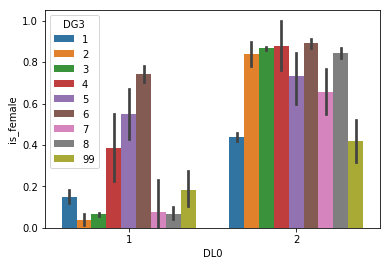

In [16]:
# make a barplot
sns.barplot(x="DL0", y="is_female", hue="DG3", data=train);

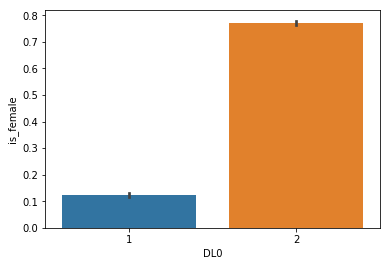

In [17]:
sns.barplot(x="DL0", y="is_female", data=train);

# I'm going to select some features below
* DG3 What is your martial status?
    * 2 = Polygamously married (i.e., has multiple spouses) then definitely a man – can check this
* DG6: How are you related to household head?
* DL0. Who is the main income earner in your household?
* DL1. In the past 12 months, were you mainly...?
* DL2. What is your primary job (i.e., the job where you spend most of your time)?
* DL26.5. Which of the following has happened in your household in the last 2 years? Death of main income-earner
    * 1 = yes
* DL5. You have said that these are the ways you got money in the past 12 months. Which of these brought you the most money?
    * 5 = Money from family/friends / spouse for regular support or emergencies
* MT2.Do you personally own a mobile phone?
* MT6.How did you obtain your phone? 
    * 2=My spouse bought it for me / gave it to me

In [34]:
# let's choose some columns that seem useful
features = ['DG3', 'DG6', 'DL0', 'DL1', 'DL2', 'DL5', 'DL26_5', 'MT2', 'MT6']
train_subset = train[features + ['is_female']].dropna()
test_subset = test[features].dropna()
X = train_subset[features]
y = train_subset['is_female']

In [33]:
print(train_subset.shape)
print(test_subset.shape)

(3868, 10)
(5890, 9)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
classifier = LogisticRegression()

# Now I'm going to do classification

In [45]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('AUC = ', roc_auc)

AUC =  0.842750367042


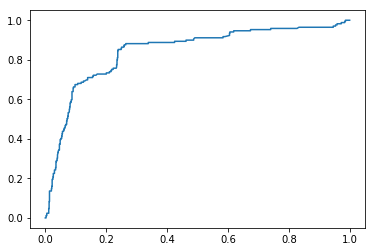

In [44]:
plt.plot(fpr,tpr)